In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# A brief introduction to the Delta Method (Univariate)

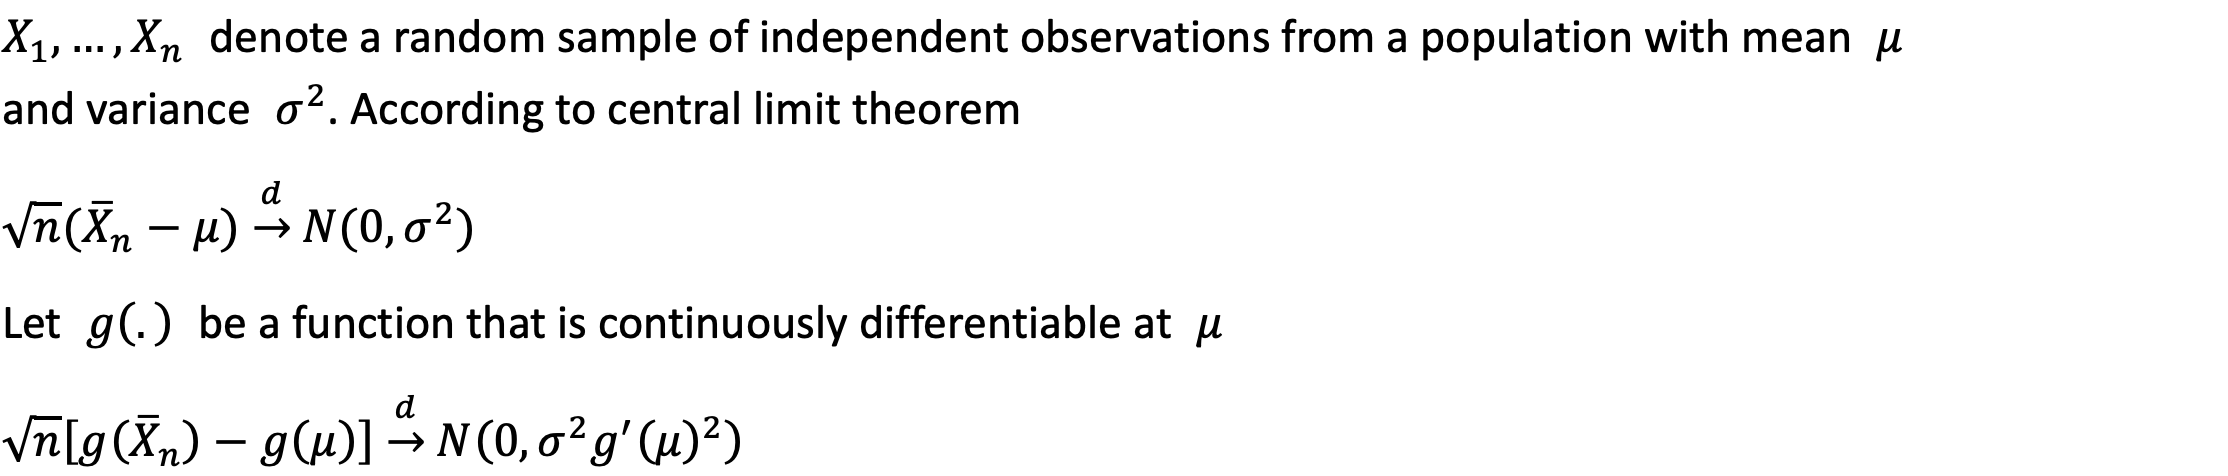

## The purpose of this study is to calculate the variance of a random variable (which is a function of another random variables with known distribution, including the true values of the parameters). Compare the theoretical variance (based on the Delta method) with the simulation-based variances.
### 1) Three distribution (of the original random variable) are consider: Normal and Exponential
### 2) Three functions (applied to the original random variable to generate a new random variable) are considered: 
- ### g(x)=2x 
- ### g(x)=1/x
- ### g(x)=x^2

### Specify the number of experiments, and the sample size. These are global settings.

In [2]:
n_experiment = 1000
sample_size  = 1000

## Example 1. Delta Method with Normal Distribution - N(mu,sigma2)

In [3]:
mu     = 10
sigma2 = 5

In [4]:
population = np.random.normal(mu,np.sqrt(sigma2),100000)

In [5]:
sample_mean = [np.nan]*n_experiment
for i in range(n_experiment):
    sample_now     = np.random.choice(population, size=sample_size,replace=True)
    sample_mean[i] = np.mean(sample_now)

In [6]:
Theoretical_mean = mu
series_1 = [np.sqrt(sample_size)*(sample_mean[i]-Theoretical_mean) for i in range(n_experiment)]
series_2 = [np.sqrt(sample_size)*(2*sample_mean[i]-2*Theoretical_mean) for i in range(n_experiment)]
series_3 = [np.sqrt(sample_size)*(1/sample_mean[i]-1/Theoretical_mean) for i in range(n_experiment)]
series_4 = [np.sqrt(sample_size)*(sample_mean[i]**2-Theoretical_mean**2) for i in range(n_experiment)]

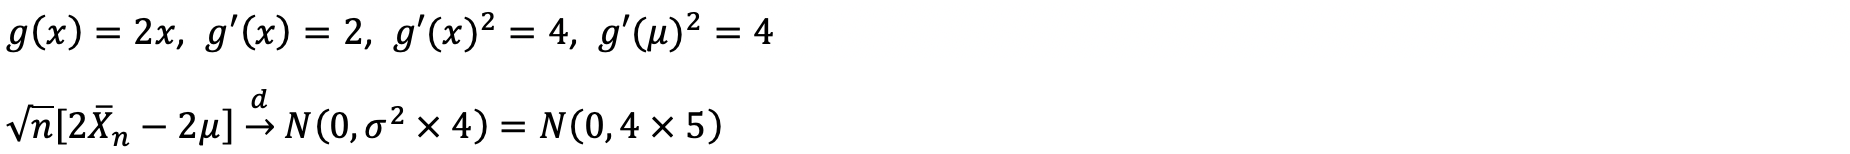

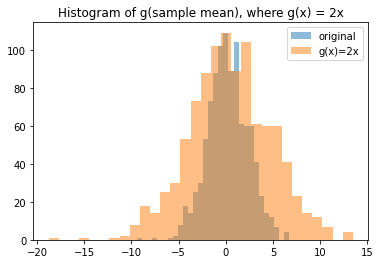

Theoretical Variance: 20
Sample Variance: 18.51


In [7]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_2,alpha=0.5,bins=30,label = 'g(x)=2x')
plt.title('Histogram of t, where g(x) = 2x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(4*sigma2))
print("Sample Variance: " + str(round(np.var(series_2,ddof=1),3)))

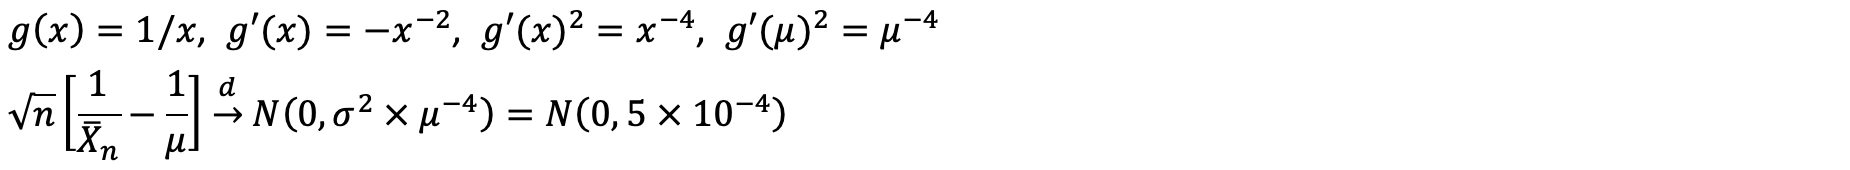

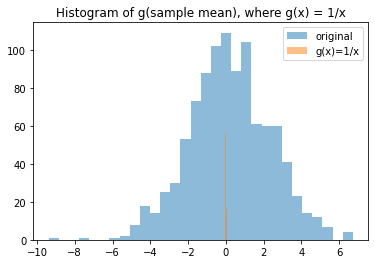

Theoretical Variance: 0.0005
Sample Variance: 0.00046


In [8]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_3,alpha=0.5,bins=30,label = 'g(x)=1/x')
plt.title('Histogram of t, where g(x) = 1/x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(sigma2*mu**(-4)))
print("Sample Variance: " + str(round(np.var(series_3,ddof=1),5)))

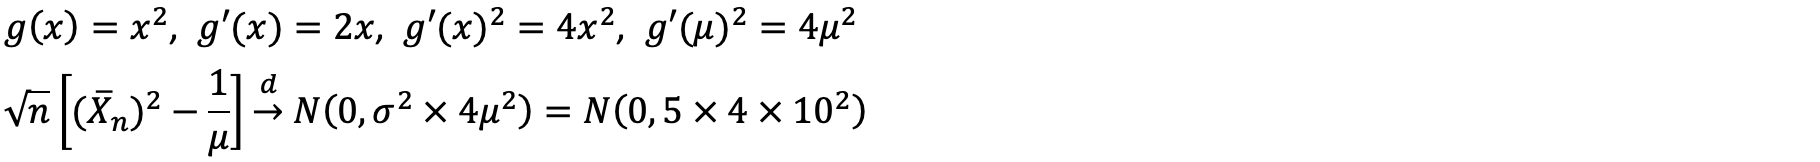

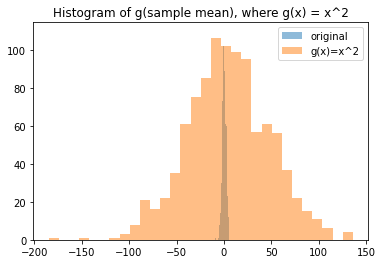

Theoretical Variance: 2000
Sample Variance: 1852.60476


In [9]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_4,alpha=0.5,bins=30,label = 'g(x)=x^2')
plt.title('Histogram of t, where g(x) = x^2')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(sigma2*4*mu**(2)))
print("Sample Variance: " + str(round(np.var(series_4,ddof=1),5)))

## Example 2. Delta Method with Exponential Distribution - Exp(Lambda)

In [10]:
Lambda = 5

In [11]:
##### In np.random.exponential, to create a sample of Exp(Lambda), using scale = 1/Lambda
population = np.random.exponential(scale = 1/Lambda,size= 100000)

In [12]:
sample_mean = [np.nan]*n_experiment
for i in range(n_experiment):
    sample_now = np.random.choice(population, size=sample_size,replace=True)
    sample_mean[i] = np.mean(sample_now)

In [13]:
Theoretical_mean = 1/Lambda
series_1 = [np.sqrt(sample_size)*(sample_mean[i]-Theoretical_mean) for i in range(n_experiment)]
series_2 = [np.sqrt(sample_size)*(2*sample_mean[i]-2*Theoretical_mean) for i in range(n_experiment)]
series_3 = [np.sqrt(sample_size)*(1/sample_mean[i]-1/Theoretical_mean) for i in range(n_experiment)]
series_4 = [np.sqrt(sample_size)*(sample_mean[i]**2-Theoretical_mean**2) for i in range(n_experiment)]

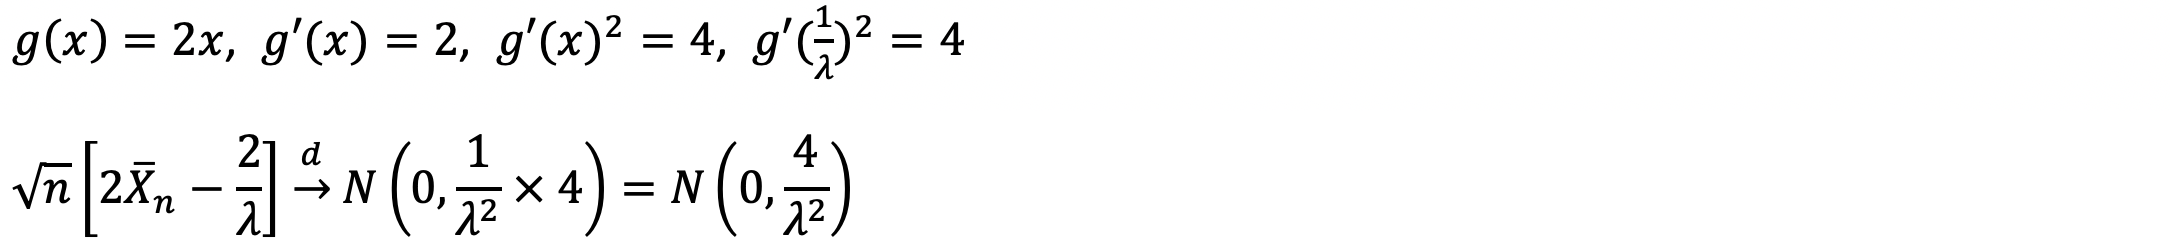

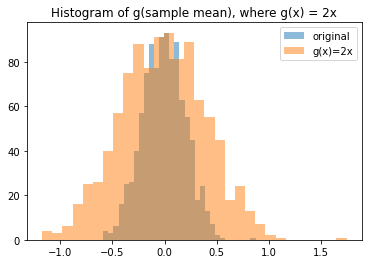

Theoretical Variance: 0.16
Sample Variance: 0.165


In [14]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_2,alpha=0.5,bins=30,label = 'g(x)=2x')
plt.title('Histogram of t, where g(x) = 2x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(round((4*(1/Lambda)**2),3)))
print("Sample Variance: " + str(round(np.var(series_2,ddof=1),3)))

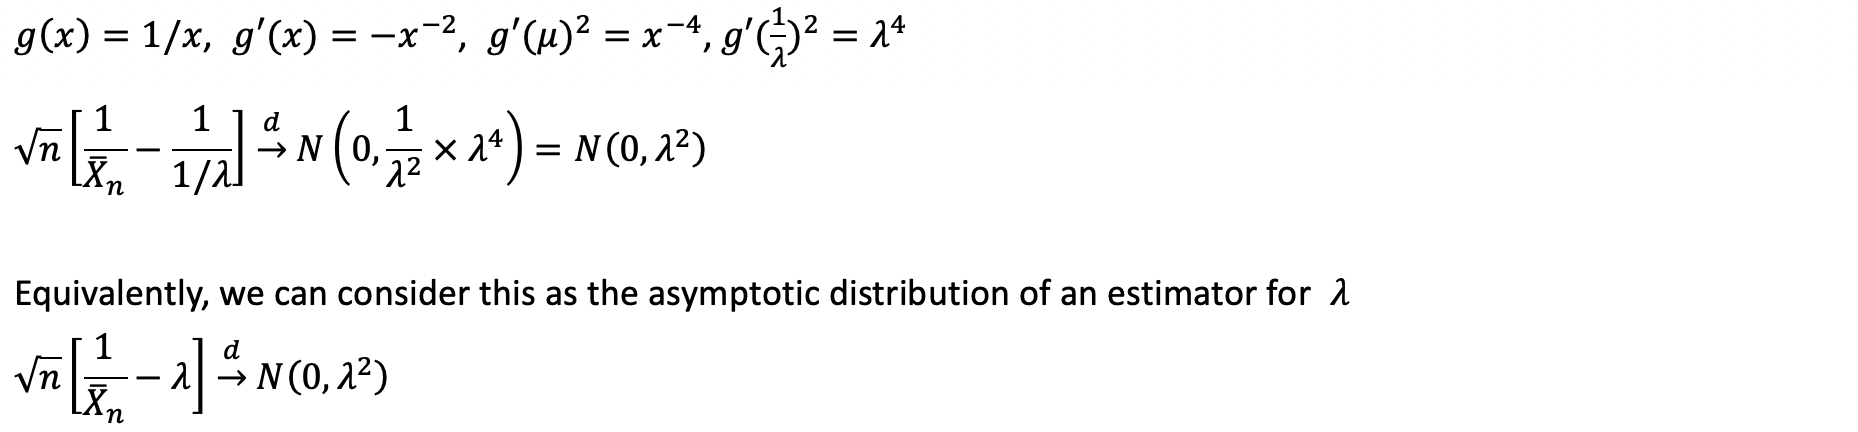

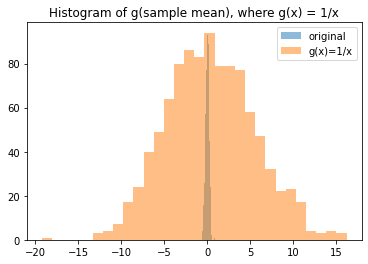

Theoretical Variance: 25
Sample Variance: 25.985


In [15]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_3,alpha=0.5,bins=30,label = 'g(x)=1/x')
plt.title('Histogram of t, where g(x) = 1/x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(Lambda**2))
print("Sample Variance: " + str(round(np.var(series_3,ddof=1),3)))

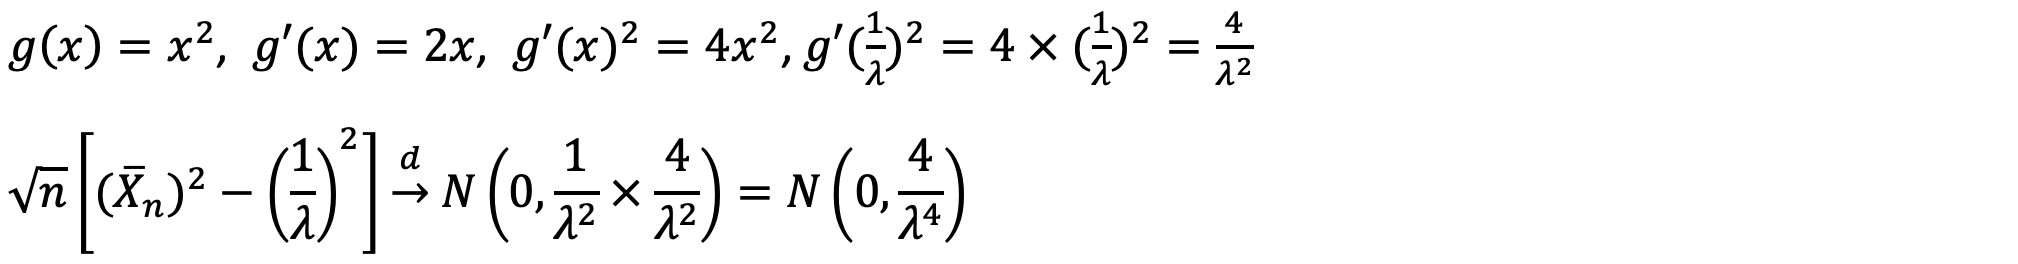

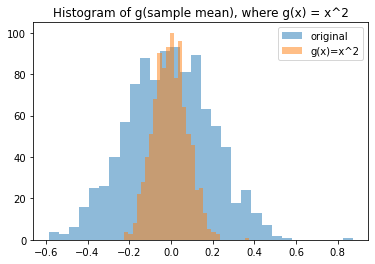

Theoretical Variance: 0.0064
Sample Variance: 0.007


In [16]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_4,alpha=0.5,bins=30,label = 'g(x)=x^2')
plt.title('Histogram of t, where g(x) = x^2')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(4/(Lambda**4)))
print("Sample Variance: " + str(round(np.var(series_4,ddof=1),3)))